## Mapa zona de estudio

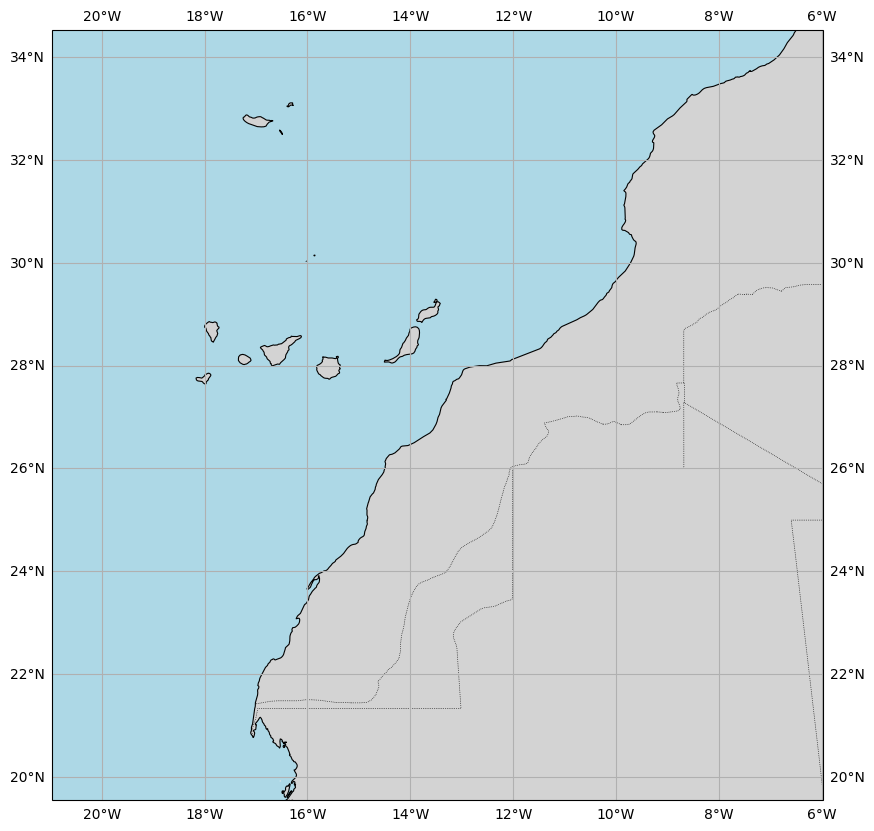

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import Normalize
import numpy as np
import os 
from matplotlib.patches import Patch
from mpl_toolkits.axes_grid1 import make_axes_locatable

src_path = os.path.abspath(os.path.join(os.getcwd(), '..'))
os.chdir(src_path)

lon_min, lon_max = -20.97, -5.975
lat_min, lat_max = 19.55, 34.525

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5)

gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl.top_labels = True
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = True

plt.savefig('metrics/others/map_with_gridlines.svg', format='svg', bbox_inches='tight')
plt.show()

### Funciones para gráficas

In [2]:
coordinates_np = np.load(r"data\atlantic\static\coordinates.npy")

coordinates_np

array([[[ 19.575,  19.575,  19.575, ...,  19.575,  19.575,  19.575],
        [ 19.625,  19.625,  19.625, ...,  19.625,  19.625,  19.625],
        [ 19.675,  19.675,  19.675, ...,  19.675,  19.675,  19.675],
        ...,
        [ 34.425,  34.425,  34.425, ...,  34.425,  34.425,  34.425],
        [ 34.475,  34.475,  34.475, ...,  34.475,  34.475,  34.475],
        [ 34.525,  34.525,  34.525, ...,  34.525,  34.525,  34.525]],

       [[-20.925, -20.875, -20.825, ...,  -6.075,  -6.025,  -5.975],
        [-20.925, -20.875, -20.825, ...,  -6.075,  -6.025,  -5.975],
        [-20.925, -20.875, -20.825, ...,  -6.075,  -6.025,  -5.975],
        ...,
        [-20.925, -20.875, -20.825, ...,  -6.075,  -6.025,  -5.975],
        [-20.925, -20.875, -20.825, ...,  -6.075,  -6.025,  -5.975],
        [-20.925, -20.875, -20.825, ...,  -6.075,  -6.025,  -5.975]]])

In [3]:
def flatten_to_2d(datos, mask, shape=(300, 300)):
    mask = mask.flatten()
    temperature_map = np.full_like(mask, np.nan, dtype=float)  # <-- Aquí

    j = 0
    for i in range(len(mask)):
        if mask[i] == 1:
            temperature_map[i] = datos[j]
            j += 1

    return temperature_map.reshape(shape)

def plot_temperature_map(temperature_map, cmap="inferno", label="Temperatura (K)", coordinates_np=coordinates_np, name="temperature_map"):
    plt.figure(figsize=(6, 6))
    ax = plt.gca()

    norm = Normalize(vmin=np.nanmin(temperature_map), vmax=np.nanmax(temperature_map))

    extent = [
        coordinates_np[1].min(), coordinates_np[1].max(),
        coordinates_np[0].min(), coordinates_np[0].max()
    ]

    im = plt.imshow(temperature_map, cmap=cmap, origin='lower', norm=norm, extent=extent)

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax, label=label)

    plt.savefig(f'{name}.svg', format='svg', bbox_inches='tight')
    plt.show()
    plt.close()

def plot_binary_mask(mask, coordinates_np=coordinates_np):
    extent = [
        coordinates_np[1].min(), coordinates_np[1].max(),
        coordinates_np[0].min(), coordinates_np[0].max()
    ]

    plt.figure(figsize=(6, 6))
    plt.imshow(mask, cmap="gray", origin="lower", extent=extent)

    legend_elements = [
        Patch(facecolor="black", label="Tierra"),
        Patch(facecolor="white", edgecolor="gray", label="Agua")
    ]
    plt.legend(handles=legend_elements, loc="lower right")

    plt.tight_layout()
    plt.savefig('metrics/others/binary_mask.svg', format='svg', bbox_inches='tight')
    plt.show()

def plot_wind_components(u_component, v_component, cmap="coolwarm", coordinates_np=coordinates_np):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    extent = [
        coordinates_np[1].min(), coordinates_np[1].max(),
        coordinates_np[0].min(), coordinates_np[0].max()
    ]

    vmin = min(np.nanmin(u_component), np.nanmin(v_component))
    vmax = max(np.nanmax(u_component), np.nanmax(v_component))
    norm = Normalize(vmin=vmin, vmax=vmax)

    im0 = axes[0].imshow(u_component, cmap=cmap, origin='lower', norm=norm, extent=extent)
    axes[0].set_title("Componente u")

    im1 = axes[1].imshow(v_component, cmap=cmap, origin='lower', norm=norm, extent=extent)
    axes[1].set_title("Componente v")

    fig.subplots_adjust(right=0.88)
    cbar_ax = fig.add_axes([0.9, 0.15, 0.02, 0.7])
    fig.colorbar(im1, cax=cbar_ax).set_label("Velocidad del viento (m/s)")

    plt.savefig('metrics/others/wind_components.svg', format='svg', bbox_inches='tight')
    plt.show()

sea_mask = np.load(r"data\atlantic\static\sea_mask.npy")

### Dato de Copernicus Marine Service

Shape of cm_file: (49061, 1)


C:\Users\Alejandro\AppData\Local\Temp\ipykernel_15516\2535650969.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  temperature_map[i] = datos[j]


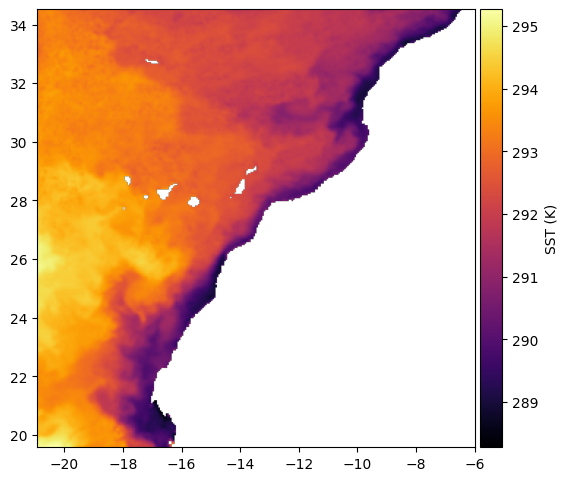

In [4]:
cm_file = r"data\atlantic\raw\reanalysis\20180101.npy"
mask = np.load("data/atlantic/static/sea_mask.npy")

cm_array = np.load(cm_file)
print("Shape of cm_file:", cm_array.shape)
cm_2d = flatten_to_2d(cm_array, mask)

plot_temperature_map(cm_2d, cmap="inferno", label="SST (K)", name="temperature_map")

### Máscara Océano-Tierra

In [5]:
mask_file = r"data\atlantic\static\sea_mask.npy"
mask = np.load(mask_file)

print("Shape of mask:", mask.shape)

print(mask)

Shape of mask: (1, 300, 300)
[[[ True  True  True ... False False False]
  [ True  True  True ... False False False]
  [ True  True  True ... False False False]
  ...
  [ True  True  True ... False False False]
  [ True  True  True ... False False False]
  [ True  True  True ... False False False]]]


### ERA5

Shape of era5_file: (49061, 1)


C:\Users\Alejandro\AppData\Local\Temp\ipykernel_15516\2535650969.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  temperature_map[i] = datos[j]


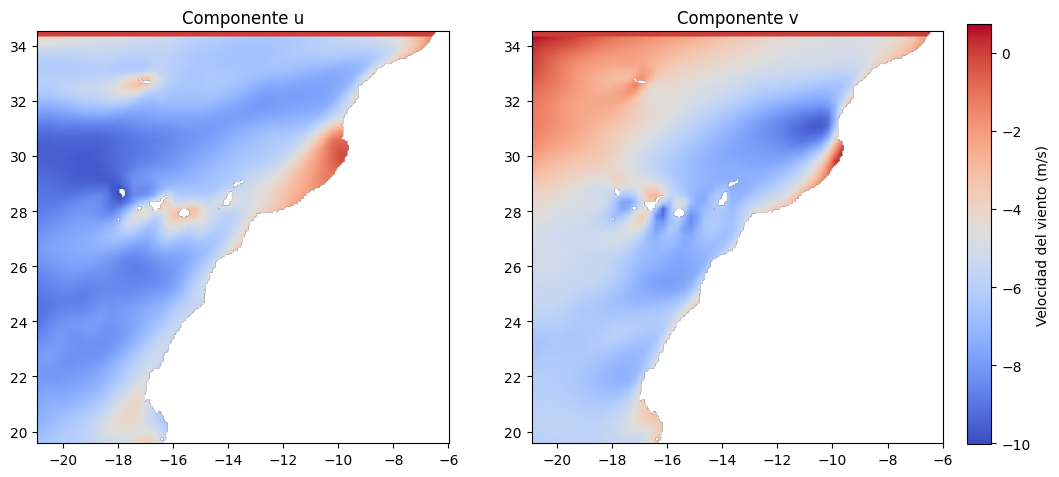

In [6]:
era5_file = r"data\atlantic\raw\era5\20180101.npy"
era5_array = np.load(era5_file)

u = era5_array[:, 0].reshape(-1, 1)
v = era5_array[:, 1].reshape(-1, 1)

print("Shape of era5_file:", u.shape)

u_2d = flatten_to_2d(u, mask)
v_2d = flatten_to_2d(v, mask)
plot_wind_components(u_2d, v_2d, cmap="coolwarm")

### Batimetría

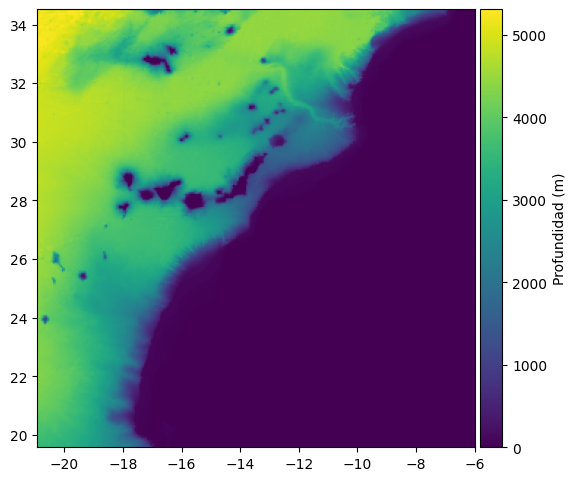

In [7]:
bath = r"data\atlantic\static\sea_depth.npy"

sea_depth = np.load(bath)
plot_temperature_map(sea_depth, cmap="viridis", label="Profundidad (m)", name="sea_depth")

### Máscara Tierra-Océano

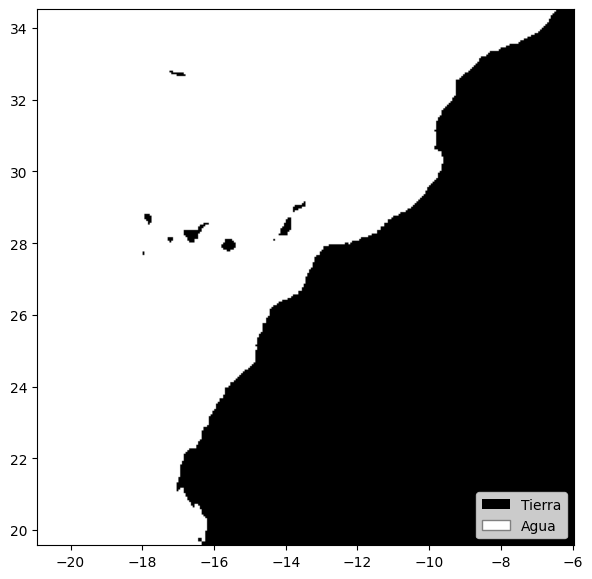

In [8]:
sea_mask = r"data\atlantic\static\sea_mask.npy"

sea_mask = np.load(sea_mask)

sea_mask = np.squeeze(sea_mask)

plot_binary_mask(sea_mask)

### Pesos grid

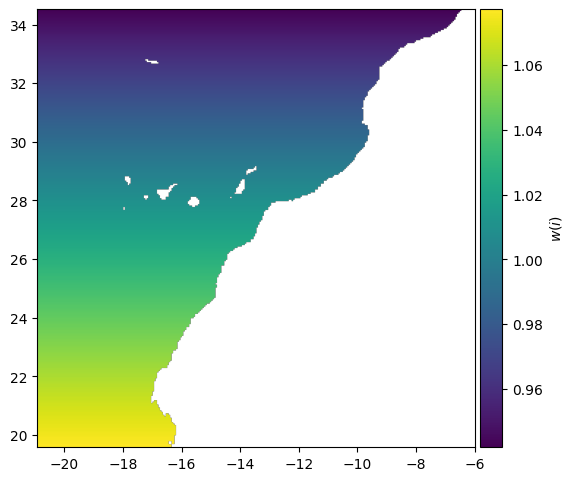

In [9]:
grid_weights = r"data\atlantic\static\grid_weights.npy"

grid_weights = np.load(grid_weights)
grid_weights = np.where(grid_weights == 0, np.nan, grid_weights)

plot_temperature_map(grid_weights, cmap="viridis", label=r"$w(i)$", name="grid_weights")

### Comprobando estados y dimensiones

In [10]:
from neural_lam.weather_dataset import WeatherDataset
from neural_lam import constants

dataset_name = "atlantic"
data_subset = "reanalysis"
forcing_prefix = "forcing"

train_data_loader = WeatherDataset(
    dataset_name,
    pred_length=1,
    split="train",
    subsample_step=1,
    forcing_prefix=forcing_prefix
)

idx = 0

init_train, target_train, forcing_train = train_data_loader[idx]
print("Init shape train:", init_train.shape)
print("Target shape train:", target_train.shape)
print("Forcing shape train:", forcing_train.shape)


val_data_loader = WeatherDataset(
    dataset_name,
    pred_length=4,
    split="val",
    subsample_step=1,
    forcing_prefix=forcing_prefix
)

init_val, target_val, forcing_val = val_data_loader[idx]
print("Init shape val:", init_val.shape)
print("Target shape val:", target_val.shape)
print("Forcing shape val:", forcing_val.shape)


split = "test"
pred_length = (constants.SAMPLE_LEN[split] // 1) - 2

test_data_loader = WeatherDataset(
    dataset_name=dataset_name,
    split=split,
    noise=None,
    data_subset=data_subset,
    forcing_prefix=forcing_prefix,
    pred_length=pred_length,
)

init_test, target_test, forcing_test = test_data_loader[idx]
print("Init shape test:", init_test.shape)
print("Target shape test:", target_test.shape)
print("Forcing shape test:", forcing_test.shape)

Init shape train: torch.Size([2, 49061, 1])
Target shape train: torch.Size([1, 49061, 1])
Forcing shape train: torch.Size([1, 49061, 12])
Init shape val: torch.Size([2, 49061, 1])
Target shape val: torch.Size([4, 49061, 1])
Forcing shape val: torch.Size([4, 49061, 12])
Init shape test: torch.Size([2, 49061, 1])
Target shape test: torch.Size([15, 49061, 1])
Forcing shape test: torch.Size([15, 49061, 12])


In [11]:
file_train = r"data\atlantic\samples\train\forcing_20180407.npy"

train_file_loaded = np.load(file_train)
print(train_file_loaded)
print("Train file shape:", train_file_loaded.shape)

[[[-3.94897413 -8.12905598]
  [-3.90416212 -8.14571857]
  [-3.85935011 -8.16238117]
  ...
  [ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.          0.        ]]

 [[-4.37879419 -9.08352375]
  [-4.33725367 -9.10179768]
  [-4.29571314 -9.1200716 ]
  ...
  [ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.          0.        ]]

 [[-4.77903891 -9.62240791]
  [-4.7420516  -9.64074287]
  [-4.7050643  -9.65907784]
  ...
  [ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.          0.        ]]

 [[-4.83131504 -9.30365658]
  [-4.78126621 -9.3307806 ]
  [-4.73121738 -9.35790462]
  ...
  [ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.          0.        ]]

 [[-6.61085606 -9.59045506]
  [-6.54581699 -9.63523045]
  [-6.48077793 -9.68000584]
  ...
  [ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.          0.        ]]

 [[-8.42688942 -9.14948368]
  [-8.39180641 -9.17566776]
  [-8.3567234  -9.20185184]
  ...
  [ 0.          0.        ]
  

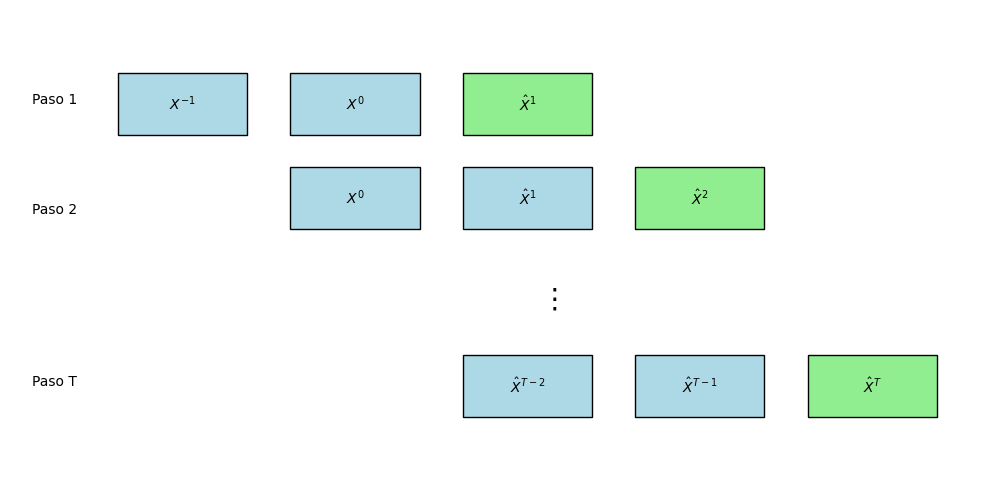

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_block(ax, x, y, label, color):
    rect = patches.Rectangle((x, y), 1.2, 0.8, linewidth=1, edgecolor='black', facecolor=color)
    ax.add_patch(rect)
    ax.text(x + 0.6, y + 0.4, label, ha='center', va='center', fontsize=10)

fig, ax = plt.subplots(figsize=(10, 5))
colors = {
    'input': '#add8e6',
    'prediction': '#90ee90'
}

x0, x1, x2, x3, x4 = 0, 1.6, 3.2, 4.8, 6.4

draw_block(ax, x0, 2.4, r'$X^{-1}$', colors['input'])
draw_block(ax, x1, 2.4, r'$X^0$', colors['input'])
draw_block(ax, x2, 2.4, r'$\hat{X}^1$', colors['prediction'])

draw_block(ax, x1, 1.2, r'$X^0$', colors['input'])
draw_block(ax, x2, 1.2, r'$\hat{X}^1$', colors['input'])
draw_block(ax, x3, 1.2, r'$\hat{X}^2$', colors['prediction'])

ax.text((x2 + x3)/2, 0.2, r'$\vdots$', fontsize=20, ha='center')

draw_block(ax, x2, -1.2, r'$\hat{X}^{T-2}$', colors['input'])
draw_block(ax, x3, -1.2, r'$\hat{X}^{T-1}$', colors['input'])
draw_block(ax, x4, -1.2, r'$\hat{X}^T$', colors['prediction'])

ax.text(-0.8, 2.8, "Paso 1", fontsize=10)
ax.text(-0.8, 1.4, "Paso 2", fontsize=10) 
ax.text(-0.8, -0.8, "Paso T", fontsize=10)

ax.set_xlim(-1, 8)
ax.set_ylim(-2, 4)
ax.axis('off')
plt.tight_layout()

plt.savefig('metrics/others/forecasting_steps.svg', format='svg', bbox_inches='tight')
plt.show()




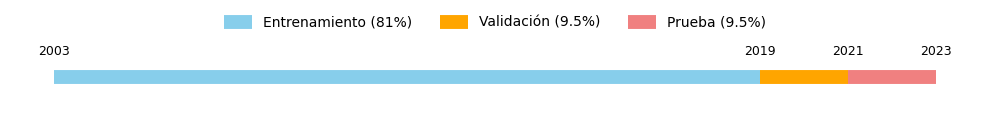

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 1.5))

ax.hlines(y=0, xmin=2003, xmax=2019, color='skyblue', linewidth=10, label='Entrenamiento (81%)')
ax.hlines(y=0, xmin=2019, xmax=2021, color='orange', linewidth=10, label='Validación (9.5%)')
ax.hlines(y=0, xmin=2021, xmax=2023, color='lightcoral', linewidth=10, label='Prueba (9.5%)')

for year in [2003, 2019, 2021, 2023]:
    ax.text(year, 0.2, str(year), ha='center', va='bottom', fontsize=9)

ax.set_ylim(-0.5, 0.5)
ax.axis('off')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=3, frameon=False)

plt.tight_layout()
plt.savefig('metrics/others/train_val_test_split.svg', format='svg', bbox_inches='tight')
plt.show()

In [14]:
file = r"data\atlantic\raw\reanalysis\20180101.npy"

data = np.load(file)

print("Shape of data:", data.shape)

Shape of data: (49061, 1)


In [15]:
file = r"data\mediterranean\raw\reanalysis\20180101.npy"

data = np.load(file)

print("Shape of data:", data.shape)

Shape of data: (144990, 75)


In [16]:
file = r"data\atlantic\static\nwp_xy.npy"

data = np.load(file)

print("Shape of data:", data.shape)

data

Shape of data: (2, 300, 300)


array([[[  0,   1,   2, ..., 297, 298, 299],
        [  0,   1,   2, ..., 297, 298, 299],
        [  0,   1,   2, ..., 297, 298, 299],
        ...,
        [  0,   1,   2, ..., 297, 298, 299],
        [  0,   1,   2, ..., 297, 298, 299],
        [  0,   1,   2, ..., 297, 298, 299]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  1,   1,   1, ...,   1,   1,   1],
        [  2,   2,   2, ...,   2,   2,   2],
        ...,
        [297, 297, 297, ..., 297, 297, 297],
        [298, 298, 298, ..., 298, 298, 298],
        [299, 299, 299, ..., 299, 299, 299]]])

In [17]:
import xarray

file = r"data\atlantic\static\bathy_mask.nc"

ds = xarray.open_dataset(file)

In [18]:
ds["mask"].values

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

#### Nodos y aristas grafo

In [19]:
import torch


def analyze_torch_file(data):
    
    if isinstance(data, torch.Tensor):
        if data.dim() == 2 and data.size(0) == 2:
            list1 = data[0]
            list2 = data[1]
            
            length1 = list1.size(0)
            length2 = list2.size(0)
            
            unique1 = torch.unique(list1).size(0)
            unique2 = torch.unique(list2).size(0)
            
            print(f"Tensor with shape {data.shape}:")
            print(f"  List 1: length = {length1}, unique values = {unique1}")
            print(f"  List 2: length = {length2}, unique values = {unique2} \n")
        else:
            print(f"Unexpected tensor shape: {data.shape}. Expected shape [2, N].")

In [20]:
print("Analyzing g2m_edge_index.pt:")
data = torch.load(r"graphs\hierarchical\g2m_edge_index.pt")
analyze_torch_file(data)

print("Analyzing m2g_edge_index.pt:")
data = torch.load(r"graphs\hierarchical\m2g_edge_index.pt")
analyze_torch_file(data)

data = torch.load(r"graphs\hierarchical\m2m_edge_index.pt")
for i in range(len(data)):
    print(f"Analyzing m2m_edge_index.pt{i}:")
    analyze_torch_file(data[i])

data = torch.load(r"graphs\hierarchical\mesh_down_edge_index.pt")
for i in range(len(data)):
    print(f"Analyzing mesh_down_edge_index.pt{i}:")
    analyze_torch_file(data[i])

data = torch.load(r"graphs\hierarchical\mesh_up_edge_index.pt")
for i in range(len(data)):
    print(f"Analyzing mesh_up_edge_index.pt{i}:")
    analyze_torch_file(data[i])

Analyzing g2m_edge_index.pt:
Tensor with shape torch.Size([2, 49061]):
  List 1: length = 49061, unique values = 49061
  List 2: length = 49061, unique values = 3573 

Analyzing m2g_edge_index.pt:
Tensor with shape torch.Size([2, 49061]):
  List 1: length = 49061, unique values = 3573
  List 2: length = 49061, unique values = 49061 

Analyzing m2m_edge_index.pt0:
Tensor with shape torch.Size([2, 27616]):
  List 1: length = 27616, unique values = 3573
  List 2: length = 27616, unique values = 3573 

Analyzing m2m_edge_index.pt1:
Tensor with shape torch.Size([2, 2886]):
  List 1: length = 2886, unique values = 398
  List 2: length = 2886, unique values = 398 

Analyzing m2m_edge_index.pt2:
Tensor with shape torch.Size([2, 270]):
  List 1: length = 270, unique values = 45
  List 2: length = 270, unique values = 45 

Analyzing mesh_down_edge_index.pt0:
Tensor with shape torch.Size([2, 3573]):
  List 1: length = 3573, unique values = 398
  List 2: length = 3573, unique values = 3573 

Analy

In [21]:
print("Analyzing g2m_edge_index.pt:")
data = torch.load(r"E:\seacast-main\graphs\hierarchical\g2m_edge_index.pt")
analyze_torch_file(data)

print("Analyzing m2g_edge_index.pt:")
data = torch.load(r"E:\seacast-main\graphs\hierarchical\m2g_edge_index.pt")
analyze_torch_file(data)

data = torch.load(r"hierarchical\graphs\uniform\m2m_edge_index.pt")
for i in range(len(data)):
    print(f"Analyzing m2m_edge_index.pt{i}:")
    analyze_torch_file(data[i])

data = torch.load(r"hierarchical\graphs\uniform\mesh_down_edge_index.pt")
for i in range(len(data)):
    print(f"Analyzing mesh_down_edge_index.pt{i}:")
    analyze_torch_file(data[i])

data = torch.load(r"hierarchical\graphs\uniform\mesh_up_edge_index.pt")
for i in range(len(data)):
    print(f"Analyzing mesh_up_edge_index.pt{i}:")
    analyze_torch_file(data[i])

Analyzing g2m_edge_index.pt:
Tensor with shape torch.Size([2, 68206]):
  List 1: length = 68206, unique values = 48581
  List 2: length = 68206, unique values = 3568 

Analyzing m2g_edge_index.pt:
Tensor with shape torch.Size([2, 196244]):
  List 1: length = 196244, unique values = 3568
  List 2: length = 196244, unique values = 49061 

Analyzing m2m_edge_index.pt0:
Tensor with shape torch.Size([2, 27616]):
  List 1: length = 27616, unique values = 3573
  List 2: length = 27616, unique values = 3573 

Analyzing m2m_edge_index.pt1:
Tensor with shape torch.Size([2, 2886]):
  List 1: length = 2886, unique values = 398
  List 2: length = 2886, unique values = 398 

Analyzing m2m_edge_index.pt2:
Tensor with shape torch.Size([2, 270]):
  List 1: length = 270, unique values = 45
  List 2: length = 270, unique values = 45 

Analyzing mesh_down_edge_index.pt0:
Tensor with shape torch.Size([2, 3573]):
  List 1: length = 3573, unique values = 398
  List 2: length = 3573, unique values = 3573 

An